In [1]:
# Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
CP = pd.read_csv(r"C:\Users\Shashi\Downloads\car_price_prediction.csv")

In [3]:
CP.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
# Checking the Information

CP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [5]:
# Checking the duplicates

CP.duplicated().sum()

313

In [6]:
CP = CP.drop_duplicates()

In [7]:
CP.duplicated().sum()

0

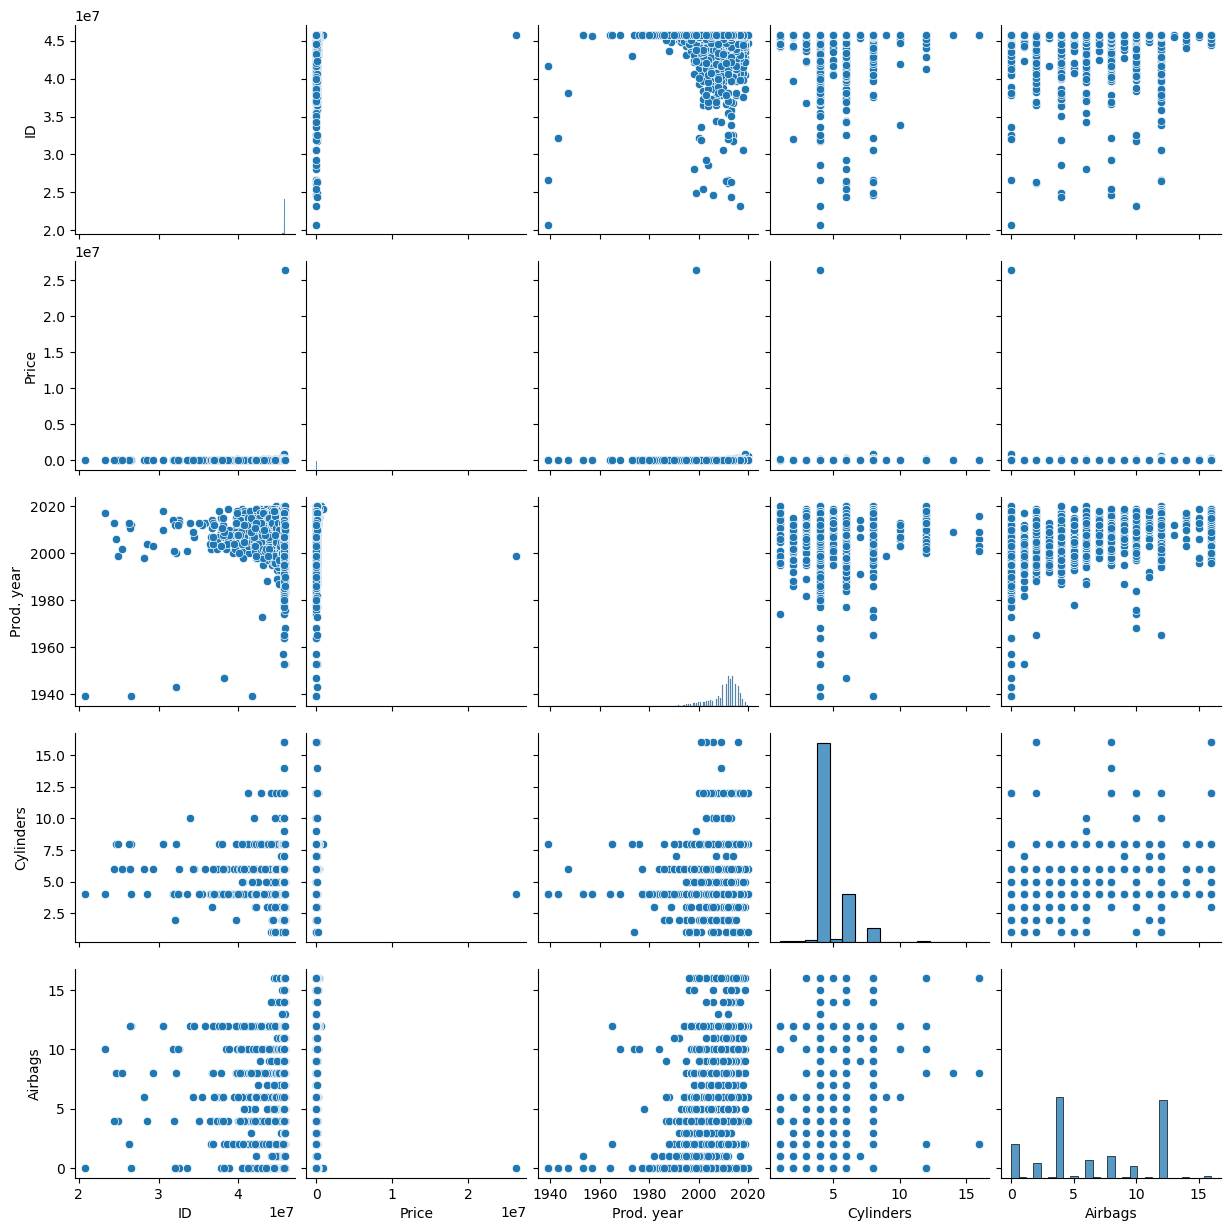

In [8]:
# Graphical Representation

sns.pairplot(CP)

In [9]:
# Checking the Zero Variance

CP.var() ==0

C:\Users\Shashi\AppData\Local\Temp\ipykernel_4968\3458895879.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  CP.var() ==0


ID            False
Price         False
Prod. year    False
Cylinders     False
Airbags       False
dtype: bool

In [10]:
# Checking the Missing Values

CP.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [12]:
# Dummy Value Creation

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

CP['Levy'] = enc.fit_transform(CP['Levy'])
CP['Manufacturer'] = enc.fit_transform(CP['Manufacturer'])
CP['Model'] = enc.fit_transform(CP['Model'])
CP['Category'] = enc.fit_transform(CP['Category'])
CP['Leather interior'] = enc.fit_transform(CP['Leather interior'])
CP['Fuel type'] = enc.fit_transform(CP['Fuel type'])
CP['Engine volume'] = enc.fit_transform(CP['Engine volume'])
CP['Mileage'] = enc.fit_transform(CP['Mileage'])
CP['Gear box type'] = enc.fit_transform(CP['Gear box type'])
CP['Drive wheels'] = enc.fit_transform(CP['Drive wheels'])
CP['Doors'] = enc.fit_transform(CP['Doors'])
CP['Wheel'] = enc.fit_transform(CP['Wheel'])
CP['Color'] = enc.fit_transform(CP['Color'])

In [13]:
CP.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,114,32,1242,2010,4,1,2,63,2838,6.0,0,0,1,0,12,12
1,44731507,16621,4,8,658,2011,4,0,5,56,2960,6.0,2,0,1,0,1,8
2,45774419,8467,0,21,684,2006,3,0,5,22,3140,4.0,3,1,1,1,1,2
3,45769185,3607,512,16,661,2011,4,1,2,46,2413,4.0,0,0,1,0,14,0
4,45809263,11726,366,21,684,2014,3,1,5,22,7396,4.0,0,1,1,0,12,4


In [14]:
CP = CP.drop('ID', axis = 1)

In [15]:
CP

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,114,32,1242,2010,4,1,2,63,2838,6.0,0,0,1,0,12,12
1,16621,4,8,658,2011,4,0,5,56,2960,6.0,2,0,1,0,1,8
2,8467,0,21,684,2006,3,0,5,22,3140,4.0,3,1,1,1,1,2
3,3607,512,16,661,2011,4,1,2,46,2413,4.0,0,0,1,0,14,0
4,11726,366,21,684,2014,3,1,5,22,7396,4.0,0,1,1,0,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,0,36,385,1999,1,1,0,37,4394,4.0,1,2,0,0,12,5
19233,15681,504,23,1334,2011,9,1,5,44,2214,4.0,2,1,1,0,11,8
19234,26108,508,23,1442,2010,4,1,1,36,638,4.0,0,1,1,0,7,4
19235,5331,83,8,456,2007,4,1,1,36,5612,4.0,0,1,1,0,1,4


In [16]:
# Standardization using Scaler Min = 0, Max = 1

def norm_fun(i):
    x = (i - i.min())/(i.max() - i.min())
    
    return x

In [17]:
data_norm = norm_fun(CP)
CP = pd.DataFrame(data_norm)
CP.describe()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
count,18924.000000,18924.000000,18924.000000,18924.000000,18924.000000,18924.000000,18924.000000,18924.000000,18924.000000,18924.000000,18924.000000,18924.000000,18924.000000,18924.000000,18924.000000,18924.000000,18924.000000
mean,0.000707,0.424109,0.516990,0.542621,0.887830,0.626680,0.725587,0.571162,0.390849,0.438258,0.238681,0.179190,0.454846,0.482985,0.076781,0.518146,0.410524
std,0.007303,0.390036,0.277927,0.258647,0.069948,0.279194,0.446230,0.301049,0.144370,0.292285,0.080015,0.299065,0.283293,0.107215,0.266250,0.357464,0.270145
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000203,0.000000,0.328125,0.337948,0.864198,0.400000,0.000000,0.333333,0.301887,0.193696,0.200000,0.000000,0.500000,0.500000,0.000000,0.066667,0.250000
50%,0.000501,0.370968,0.500000,0.524858,0.901235,0.700000,1.000000,0.833333,0.339623,0.409120,0.200000,0.000000,0.500000,0.500000,0.000000,0.466667,0.375000
75%,0.000839,0.820789,0.843750,0.771554,0.938272,0.900000,1.000000,0.833333,0.433962,0.664065,0.200000,0.333333,0.500000,0.500000,0.000000,0.800000,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
# Spliting the data

X = CP.drop('Price', axis = 1)
Y = CP.Price

In [21]:
# Train_test_split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [32]:
X = (X > 0).astype(int)
Y = (Y > 0).astype(int)
x_train = (x_train > 0).astype(int)
y_train = (y_train > 0).astype(int)
x_test = (x_test > 0).astype(int)
y_test = (y_test > 0).astype(int)

In [33]:
# Model Building 

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class = "multinomial", solver = "newton-cg")
model.fit(x_train, y_train)

# Checking the model Score

model.score(X, Y)

0.9998943140984993

In [34]:
# Train Score

model.score(x_train, y_train)

0.9998490110221954

In [35]:
# Test Score

model.score(x_test, y_test)

1.0

In [37]:
y_pred = model.predict(x_test)

In [38]:
# Confusion Matrix, Accuracy_score

from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[5678]]


1.0

## Result : In this model we got score more than 99%, I can say this model is right fit.